# 0. Set up
## 0.1 If if needed, clone Demeter with git

In [1]:
!git clone --branch feature/002-rotation https://github.com/antonfrancois/Demeter_metamorphosis.git

Cloning into 'Demeter_metamorphosis'...
remote: Enumerating objects: 5577, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 5577 (delta 77), reused 90 (delta 53), pack-reused 5441 (from 1)
Receiving objects: 100% (5577/5577), 613.63 MiB | 44.93 MiB/s, done.
Resolving deltas: 100% (3645/3645), done.
Updating files: 100% (176/176), done.


In [11]:
!git pull origin feature/002-rotation

remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 9 (delta 6), reused 9 (delta 6), pack-reused 0 (from 0)
Unpacking objects: 100% (9/9), 782.90 KiB | 4.25 MiB/s, done.
From https://github.com/antonfrancois/Demeter_metamorphosis
 * branch            feature/002-rotation -> FETCH_HEAD
   e3bb371..95a9347  feature/002-rotation -> origin/feature/002-rotation
Updating e3bb371..95a9347
Fast-forward
 examples/meta_rigid_BratsReg.ipynb  | 4147 +++++++++++------------------------
 src/demeter/metamorphosis/rotate.py |   18 +-
 2 files changed, 1264 insertions(+), 2901 deletions(-)


In [13]:
!git status

On branch feature/002-rotation
Your branch is up to date with 'origin/feature/002-rotation'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   src/demeter/metamorphosis/abstract.py
	new file:   src/demeter_metamorphosis.egg-info/PKG-INFO
	new file:   src/demeter_metamorphosis.egg-info/SOURCES.txt
	new file:   src/demeter_metamorphosis.egg-info/dependency_links.txt
	new file:   src/demeter_metamorphosis.egg-info/requires.txt
	new file:   src/demeter_metamorphosis.egg-info/top_level.txt



and install the package

In [1]:
import subprocess
import sys, os

cwd = subprocess.check_output("pwd", text=True).strip()
if not "Demeter" in cwd:
	%cd Demeter_metamorphosis/


print("\nInstalation of demeter from pip")
!pip install -e .
# !pip install -e .

repo_path = os.path.abspath('.')
# repo_path = "/content/Demeter_metamorphosis/"
if repo_path not in sys.path:
	sys.path.insert(0, repo_path)
print(sys.path)


/content/Demeter_metamorphosis

Instalation of demeter from pip
Obtaining file:///content/Demeter_metamorphosis
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for demeter_metamorphosis (pyproject.toml) ... done
  Created wheel for demeter_metamorphosis: filename=demeter_metamorphosis-0.2.11-0.editable-py3-none-any.whl size=4322 sha256=f4bb6da9f1299320a14064d7d9d547991a4ea671780a3622e79e82233c596e53
  Stored in directory: /tmp/pip-ephem-wheel-cache-iga06973/wheels/c7/71/aa/4dfac81c8e26328effd94ced03987bdc69e149508d2e247f6c
Successfully built demeter_metamorphosis
  Attempting uninstall: demeter_metamorphosis
    Found existing installation: demeter_metamorphosis 0.2.11
    Uninstalling demeter_metamorphosis-0.2.11:
      Successfully uninstalled demeter_metamorphosis-0.2.11
['/content/Demeter_metamorphosis', 

In [2]:
!pip install pynrrd
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 0.2 After jupyter restart, run :

In [4]:


import sys
import os


# Remplace par le chemin relatif où se trouve le package 'demeter'
# Exemple : si ton notebook est dans le dossier root du repo, et demeter est un sous-dossier
import subprocess
cwd = subprocess.check_output("pwd", text=True).strip()
if not "Demeter" in cwd:
	%cd Demeter_metamorphosis/

# repo_path = os.path.abspath('.')
repo_path = "/content/Demeter_metamorphosis/"
if repo_path not in sys.path:
	sys.path.insert(0, repo_path)
print(sys.path)



['/content/Demeter_metamorphosis/', '/content/Demeter_metamorphosis', '/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/content/Demeter_metamorphosis/src', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/root/.ipython']


# 1. code utile

## imports

In [5]:
import demeter.utils.torchbox as tb
from demeter.constants import *
import demeter.metamorphosis as mt
import demeter.utils.reproducing_kernels as rk
import demeter.utils.rigid_exploration as rg

import sys
import os

# Add the directory containing brats_utils to the Python path
brats_utils_path = os.path.join(os.path.abspath('.'), 'examples/') # Assuming brats_utils is in a 'src' subdirectory
print(brats_utils_path)

if brats_utils_path not in sys.path:
    sys.path.insert(0, brats_utils_path)

import brats_utils as bu

%load_ext autoreload
%autoreload 2
import demeter.metamorphosis.rotate as mtrt
import demeter.utils.axes3dsliders_plt as a3s
from scipy.spatial.transform import Rotation as R

# from ipywidgets import ToggleButton, ToggleButtonStyle
from ipywidgets.widgets.widget_bool import ToggleButtonStyle


# term_width = os.get_terminal_size().columns
term_width = 30


def prepare_momenta(image_shape,
                    image : bool = True,
                    rotation : bool = True,
                    translation : bool = True,
                    rot_prior = None,
                    trans_prior= None,
                    device = "cuda:0",
                    requires_grad = True):
    dim = 2 if len(image_shape) == 4 else 3
    if rot_prior is None:
        rot_prior = torch.zeros((dim,))
    if trans_prior is None:
        trans_prior = [0] * dim
    momenta = {}
    kwargs = {
        "dtype":torch.float32,
        "device":device
    }
    if image:
        momenta["momentum_I"]= torch.zeros(S.shape,**kwargs)
    if rotation:
        if len(rot_prior.shape)==2:
            momenta["momentum_R"] = torch.tensor(rot_prior,**kwargs)
        elif len(rot_prior.shape)==1:
            r1, r2, r3 = rot_prior
            momenta["momentum_R"] = torch.tensor(
            [[0,-r1, -r2 ],
                     [r1, 0, -r3],
                     [r2, r3, 0]],
                    dtype=torch.float32, device='cuda:0')
        else:
            raise ValueError("Rotation prior must be 2 or 1 dimensional")
    if translation:
        momenta["momentum_T"]= torch.tensor(trans_prior,
                                            **kwargs)

    for keys in momenta.keys():
        momenta[keys].requires_grad=requires_grad

    return momenta

def random_affine_def():
    rdm_angle = torch.randn((3,))/4
    rdm_translation = torch.randn((3,))/15

    args_aff = torch.cat(
        [
            rdm_angle,
            rdm_translation,
            torch.ones_like(rdm_angle)
        ], dim = 0
    )
    print(args_aff)

    # args_aff = torch.tensor(
    #         [.6,-.3, 0, # angle
    #         .1,.02,0,   # translation
    #         1,1,1] # scaling
    # )
    aff_mat = tb.create_affine_mat_3d(args_aff)
    print(aff_mat)
    aff_grid = tb.affine_to_grid_3d(aff_mat, img_1.shape[2:])
    return aff_grid, aff_mat


def pixel_to_2square_landmark(landmarks, image_size):
    if len(image_size) > 3:
        image_size = image_size[2:]
    landmarks = landmarks.clone().float()
    for i in range(landmarks.shape[1]):
        landmarks[:,i] *= 2/ (image_size[i] )
    return landmarks - 1

def test_pixel_to_2square_landmark():
    landmarks = torch.tensor(
        [[0,0,0],[240,240,155],[240//2, 240//2, 155//2]]
    )
    img_shape = (1, 1, 240, 240, 155)
    expected_result = torch.tensor([[-1.0000, -1.0000, -1.0000],
        [ 1.0000,  1.0000,  1.0000],
        [ 0.0000,  0.0000, -0.0065]])
    actual_result = pixel_to_2square_landmark(landmarks, img_shape)
    print('landmarks',landmarks)
    print("landmarks processed",pixel_to_2square_landmark(landmarks,img_shape))
    assert expected_result == actual_result

def apply_aff_to_landmarks(landmarks, grid):
    """
    Transport landmarks by a deformation grid.
    """
    new_land = torch.zeros_like(landmarks)
    for i, l in enumerate(landmarks):
        new_land[i]  = grid[:, int(l[2]), int(l[1]), int(l[0])]            # Bad orient

    return new_land

def inverse_affine(affine):
    """
    Compute the inverse of the affine transformation.
    """
    rot = affine[:3, :3]
    trans = affine[:3, 3][None]
    inv_rot = rot.T
    inv_trans = - trans.T

    new_aff = torch.cat([inv_rot, inv_trans], dim=1)
    return  torch.cat([new_aff, affine[-1][None]], dim=0)

/usr/local/lib/python3.11/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


saves_overview.csv
/content/Demeter_metamorphosis/examples/
🔍 Vérification de l'environnement Matplotlib interactif...
❌ ipympl (nécessaire pour `%matplotlib widget`) n'est pas installé.
👉 Exécute : `pip install ipympl` dans une cellule ou un terminal.


# Open raw images

torch.Size([6, 3])
torch.Size([1, 1, 192, 192, 124])
torch.Size([1, 1, 192, 192, 124])
landmarks 0 
 tensor([[ 44.8000,  70.4000,  56.0000],
        [ 54.4000, 116.8000,  96.0000],
        [ 63.2000, 120.8000,  96.0000],
        [ 58.4000,  96.8000,  45.6000],
        [ 41.6000,  72.0000,  95.2000],
        [ 36.8000,  84.8000,  85.6000]])
landmarks 1 
 tensor([[ 47.2000,  70.4000,  55.2000],
        [ 54.4000, 116.8000,  97.6000],
        [ 60.8000, 123.2000,  96.0000],
        [ 59.2000,  96.0000,  45.6000],
        [ 41.6000,  72.0000,  96.0000],
        [ 39.2000,  84.8000,  85.6000]])


/content/Demeter_metamorphosis/src/demeter/utils/axes3dsliders_plt.py:321: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  Slider(ax=ax_t, label="t", valmin=0, valmax=T - 1, valinit=T - 1, valfmt="%0.0f", valstep=1),
ic| axes3dsliders_plt.py:636 in _add_lines_on_plt_()
    x: 96
    y: 96
    z: 62


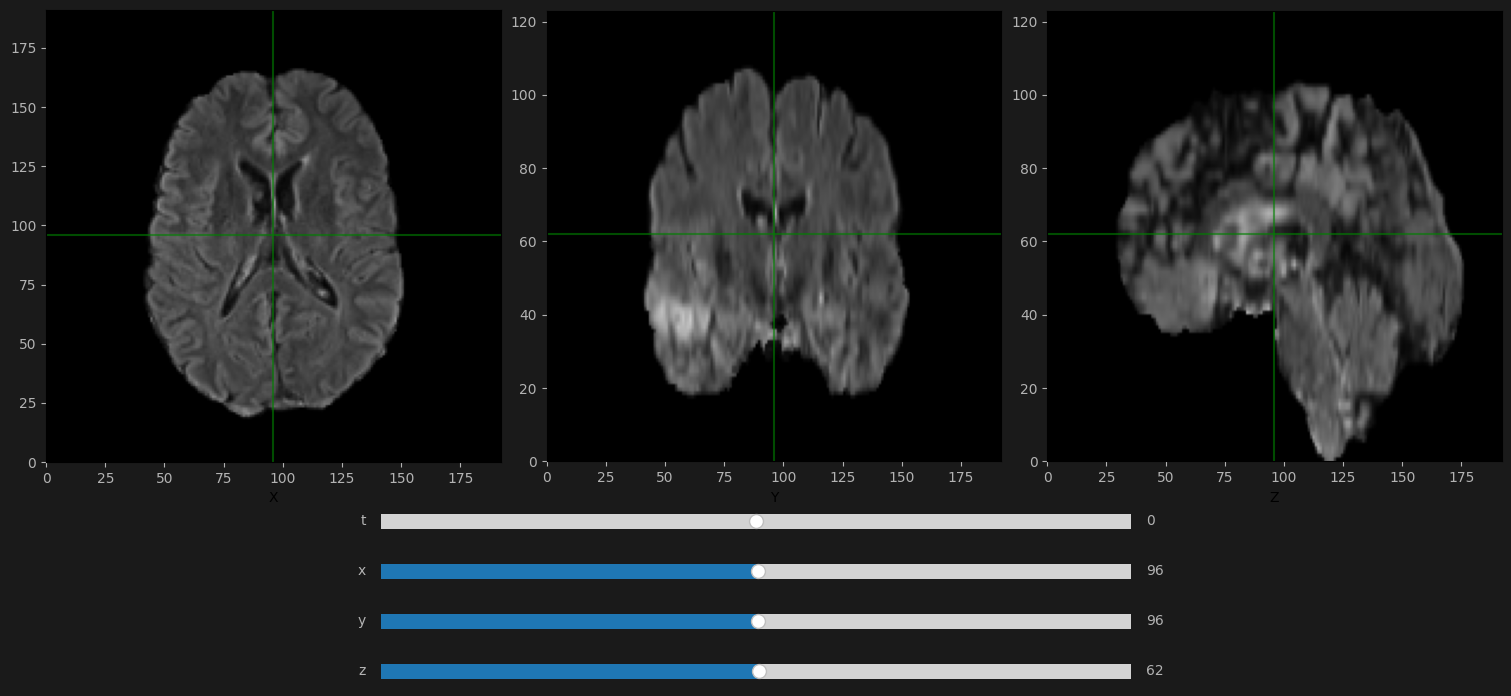

In [6]:
brats_list = [
        # "BraTSReg_086",
        #"BraTSReg_090","BraTSReg_084",
        # "BraTSReg_046",
        # "BraTSReg_002",
    "BraTSReg_021",
    #     "BraTSReg_040",
    # "BraTSReg_118","BraTSReg_114","BraTSReg_132",

        # "BraTSReg_101","BraTSReg_073","BraTSReg_025","BraTSReg_022","BraTSReg_068","BraTSReg_120","BraTSReg_031","BraTSReg_088","BraTSReg_006","BraTSReg_003","BraTSReg_024","BraTSReg_035","BraTSReg_076","BraTSReg_012","BraTSReg_123",
    # 'BraTSReg_034',
    #     'BraTSReg_048',
    # 'BraTSReg_055', 'BraTSReg_082', 'BraTSReg_045', 'BraTSReg_089', 'BraTSReg_057',
        # 'BraTSReg_096', 'BraTSReg_083', 'BraTSReg_042', 'BraTSReg_061', 'BraTSReg_074', 'BraTSReg_097', 'BraTSReg_056', 'BraTSReg_033', 'BraTSReg_136', 'BraTSReg_119', 'BraTSReg_108', 'BraTSReg_054', 'BraTSReg_091', 'BraTSReg_100', 'BraTSReg_030', 'BraTSReg_126', 'BraTSReg_133', 'BraTSReg_138', 'BraTSReg_053', 'BraTSReg_110', 'BraTSReg_079',
    # 'BraTSReg_008', 'BraTSReg_131', 'BraTSReg_001', 'BraTSReg_023', 'BraTSReg_064', 'BraTSReg_067', 'BraTSReg_115', 'BraTSReg_029', 'BraTSReg_093', 'BraTSReg_129', 'BraTSReg_005',
    #  'BraTSReg_140',
        #'BraTSReg_036', 'BraTSReg_071'
    ]


device = 'cuda:0'
valid = False
brats_folder= '2022_valid' if valid else '2022_train'
modality = 'flair'
pb = bu.parse_brats(brats_list=brats_list,brats_folder=brats_folder,modality=modality)
save_folder = None
scale_img = .8

i = 0
img_1,img_2,seg_1,seg_2,landmarks = pb(i,to_torch=True,scale=scale_img,modality=modality)

# img_1 = torch.nn.functional.pad(img_1,(0,0,10,20,0,0), "constant",.5)
print(landmarks[0].shape)
print(img_1.shape)
print(img_2.shape)
# land_2square =  pixel_to_2square_landmark(landmarks[0], img_1.shape)
# ic(landmarks,land_2square)
land_1, land_2 = landmarks
# land_1 =  land_0 +5
print("landmarks 0 \n",land_1)
print("landmarks 1 \n", land_2)
id_grid = tb.make_regular_grid( img_1.shape[2:])

ias = a3s.Image3dAxes_slider(img_1)
plt.show()

tensor([ 0.3852, -0.0734, -0.5447,  0.0379, -0.0723, -0.0932,  1.0000,  1.0000,
         1.0000])
tensor([[ 0.9242, -0.2862, -0.2528,  0.0379],
        [ 0.3748,  0.8069,  0.4566, -0.0723],
        [ 0.0733, -0.5168,  0.8530, -0.0932],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])


ic| axes3dsliders_plt.py:1303 in compare_images_with_landmarks()
    "image_0": 'image_0'
    image0.shape: torch.Size([1, 1, 192, 192, 124])


land_0_aff tensor([[ 34.9770, 110.0197,  65.9377],
        [ 57.2091, 122.0205, 117.1360],
        [ 66.4924, 121.2480, 115.4293],
        [ 53.6719, 130.4605,  62.9310],
        [ 34.5277,  92.8129, 101.2950],
        [ 32.3309, 109.8852, 100.2075]])


ic| axes3dsliders_plt.py:636 in _add_lines_on_plt_()
    x: 96
    y: 96
    z: 62


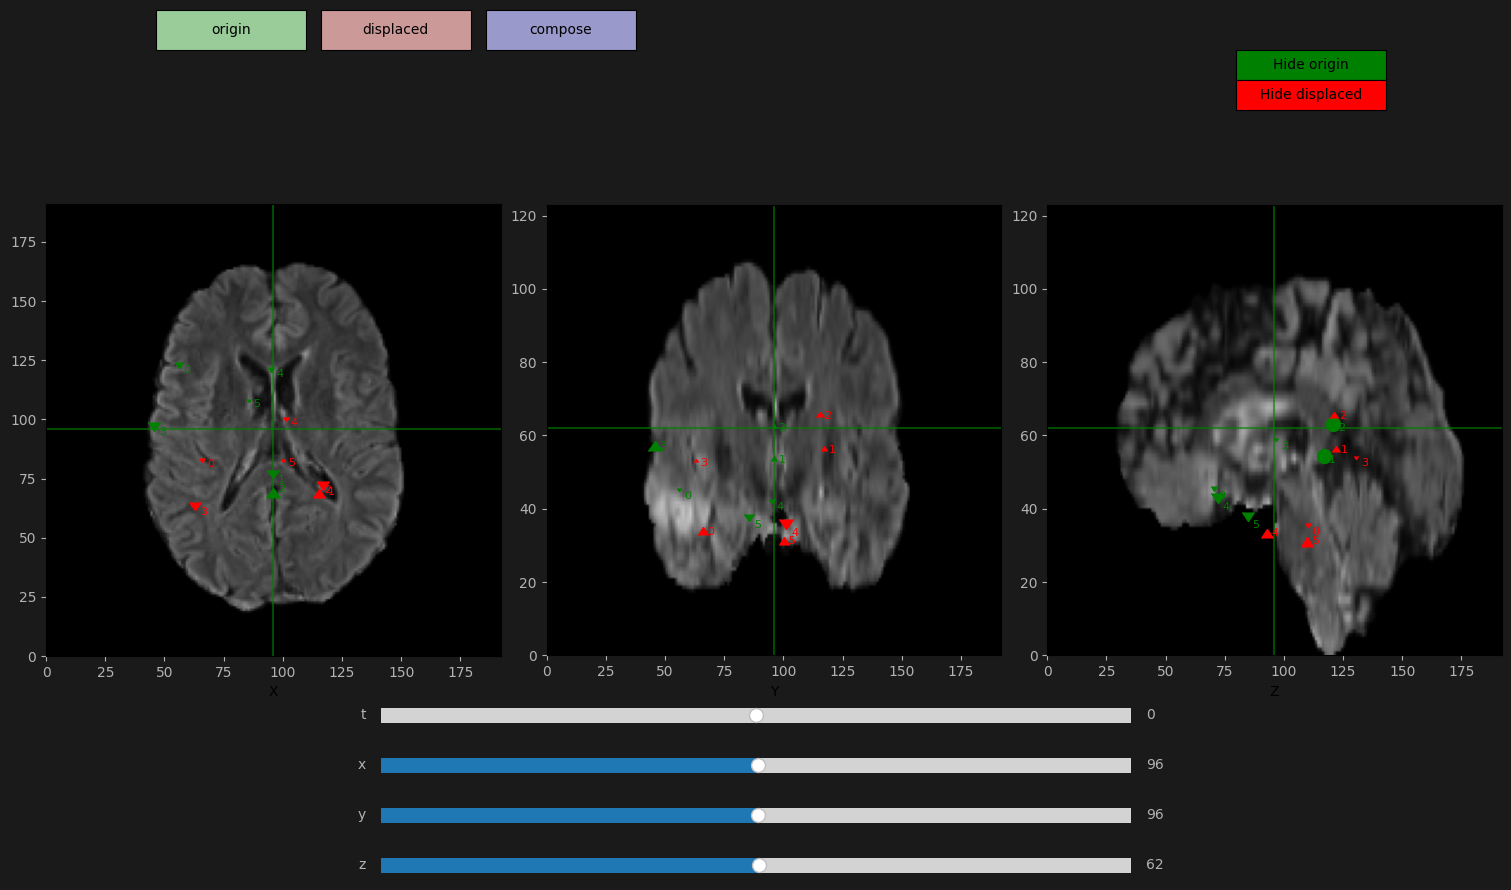

Images ready to be registred
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [11]:
torch.manual_seed(0)
grid, affine = random_affine_def()

# param = torch.tensor([
#     0,0,torch.pi/3,
#     0,0,0,
#     1,1,1
# ])
# affine = tb.create_affine_mat_3d(param)
# grid = tb.affine_to_grid_3d(affine, img_1.shape[2:])
inv_aff = inverse_affine(affine)
inv_grid = tb.affine_to_grid_3d(inv_aff, img_1.shape[2:])

img_1_aff = tb.imgDeform(img_1, grid  )

inv_grid = tb.square2_to_pixel_convention(inv_grid,True)
land_1_aff = apply_aff_to_landmarks(land_1, inv_grid)



print("land_0_aff", land_1_aff)
a3s.compare_images_with_landmarks(img_1, img_1_aff, land_1, land_1_aff, labels = ["origin", "displaced"])

print("Images ready to be registred")
print("^"*term_width)

source =  img_1_aff.contiguous()
target  = img_2.contiguous()

# Apply Metamorphosis
## barycentre alignement

In [5]:
print("="*term_width)
print("Barycentre alignement\n")
shape_list = torch.tensor(source.size()[2:])/2
print(source.shape)
print(shape_list)

source_b, target_b, trans_s, trans_t = rg.align_barycentres(source, target, verbose=True)
land_1_b = land_1 - trans_s * shape_list
land_2_b = land_2 - trans_t * shape_list
print(land_1, land_1_b)
print(land_2, land_2_b)
# a3s.compare_images_with_landmarks(source, source_b,
#                                   land_1, land_1_b,
#                                   labels = ["source", "source_barycentred"])
# a3s.compare_images_with_landmarks(target, target_b,land_2, land_2_b,
#                                   labels = ["target", "target_barcentred"])
# a3s.compare_images_with_landmarks(source_b, target_b,
#                                   land_1_b, land_2_b,
#                                   labels = ["source_barycentred", 'target_barcentred'])

Barycentre alignement

torch.Size([1, 1, 192, 192, 124])
tensor([96., 96., 62.])
S compute barycentre : tensor([-0.0497,  0.1425,  0.1899])
T compute barycentre : tensor([-0.0790,  0.1302, -0.0551])
diff :  tensor([-0.0293, -0.0123, -0.2450])
tensor([[ 44.8000,  70.4000,  56.0000],
        [ 54.4000, 116.8000,  96.0000],
        [ 63.2000, 120.8000,  96.0000],
        [ 58.4000,  96.8000,  45.6000],
        [ 41.6000,  72.0000,  95.2000],
        [ 36.8000,  84.8000,  85.6000]]) tensor([[ 49.5667,  56.7201,  44.2270],
        [ 59.1667, 103.1201,  84.2270],
        [ 67.9667, 107.1201,  84.2270],
        [ 63.1667,  83.1201,  33.8270],
        [ 46.3667,  58.3201,  83.4270],
        [ 41.5667,  71.1201,  73.8270]])
tensor([[ 47.2000,  70.4000,  55.2000],
        [ 54.4000, 116.8000,  97.6000],
        [ 60.8000, 123.2000,  96.0000],
        [ 59.2000,  96.0000,  45.6000],
        [ 41.6000,  72.0000,  96.0000],
        [ 39.2000,  84.8000,  85.6000]]) tensor([[ 54.7824,  57.9021,  58.6

## Prepare Metamorphosis optimizer

In [6]:
kernelOperator = rk.GaussianRKHS(sigma=(15,15,15),normalized=False)
datacost = mt.Rotation_Ssd_Cost(img_1.to('cuda:0'), alpha=1)


mr = mt.rigid_along_metamorphosis(
    source_b, target_b, momenta_ini=0,
    kernelOperator= kernelOperator,
    rho = 1,
    data_term=datacost ,
    integration_steps = 10,
    cost_cst=.1,
)

dict_keys(['source', 'target', 'geodesic', 'cost_cst', 'data_term', 'hamiltonian_integration', 'debug', 'lbfgs_max_iter', 'lbfgs_history_size'])


## Rigid Explorator

In [7]:

top_params = rg.initial_exploration(mr,r_step=3, max_output = 5, verbose=True)
print(top_params)

# top_params =  [
#     (torch.tensor(22700.7285), torch.tensor([-3.1416, -0.6283,  1.8850])),
#     (torch.tensor(22830.1152), torch.tensor([ 0.6283, -3.1416,  1.8850])),
# ]

Init search : 1 / 27
dict_keys(['momentum_R'])
	 (tensor(13616.6406), tensor([-3.1416, -3.1416, -3.1416]))
Init search : 2 / 27
dict_keys(['momentum_R'])
	 (tensor(13384.3545), tensor([-3.1416, -3.1416, -1.0472]))
Init search : 3 / 27
dict_keys(['momentum_R'])
	 (tensor(13639.7188), tensor([-3.1416, -3.1416,  1.0472]))
Init search : 4 / 27
dict_keys(['momentum_R'])
	 (tensor(13010.0449), tensor([-3.1416, -1.0472, -3.1416]))
Init search : 5 / 27
dict_keys(['momentum_R'])
	 (tensor(11704.8535), tensor([-3.1416, -1.0472, -1.0472]))
Init search : 6 / 27
dict_keys(['momentum_R'])
	 (tensor(13284.4395), tensor([-3.1416, -1.0472,  1.0472]))
Init search : 7 / 27
dict_keys(['momentum_R'])
	 (tensor(13905.6152), tensor([-3.1416,  1.0472, -3.1416]))
Init search : 8 / 27
dict_keys(['momentum_R'])
	 (tensor(13590.4395), tensor([-3.1416,  1.0472, -1.0472]))
Init search : 9 / 27
dict_keys(['momentum_R'])
	 (tensor(14734.4600), tensor([-3.1416,  1.0472,  1.0472]))
Init search : 10 / 27
dict_keys(['mom

## Optimize Rigid on best values


In [7]:
# best_loss, best_momentum, best_translation, best_rot = rg.optimize_on_rigid(mr, top_params, n_iter=10,verbose=True)
# rot_def =   tb.apply_rot_mat(mr.mp.id_grid, best_rot.T)

# rot_def -= best_translation
# img_rot = tb.imgDeform(mr.mp.image, rot_def.to('cpu'),
#                        dx_convention='2square', clamp=True)
#
# a3s.compare_images_with_landmarks(img_rot, source_b, land_1_b, land_2_b,
#                                   labels= ["img_rot", "source_b"],)
#
# a3s.compare_images_with_landmarks(img_rot, target_b, land_1_b, land_2_b,
#                                   labels= ["img_rot", "target_b"],)

best_momentum = torch.tensor([[ 0.0000,  1.9314,  0.9529],
        [-1.9314,  0.0000, -2.8442],
        [-0.9529,  2.8442,  0.0000]])
best_translation = torch.tensor([ 0.0488, -0.1214, -0.0680])

dict_keys(['source', 'target', 'geodesic', 'cost_cst', 'data_term', 'hamiltonian_integration', 'debug', 'lbfgs_max_iter', 'lbfgs_history_size'])


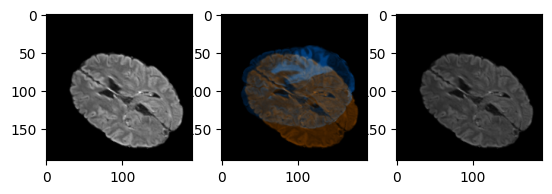

In [20]:
momenta = mtrt.prepare_momenta(
    # mr.source.shape,
    img_1.shape,
    image=True,
    rotation=True,
    translation=True,
    rot_prior=best_momentum.detach().clone(),trans_prior=best_translation.detach().clone(),
)
kernelOperator = rk.GaussianRKHS(sigma=(10,10,10),normalized=False)
datacost = mt.Rotation_Ssd_Cost(img_1.to('cuda:0'), alpha=.5)
mr = mt.rigid_along_metamorphosis(
    source, target, momenta_ini=momenta,
    kernelOperator= kernelOperator,
    rho = 1,
    data_term=datacost ,
    integration_steps = 10,
    cost_cst=.1,
    n_iter=0,
    save_gpu_memory=False,
    lbfgs_max_iter = 20,
    lbfgs_history_size = 20,
)
mr.mp.forward(source, momenta, save=True)

img = mr.mp.image[0,0,..., source.shape[-1]//2].detach().cpu()
img_target = tb.imCmp(mr.mp.image[..., source.shape[-1]//2].detach().cpu(), mr.target[..., source.shape[-1]//2].detach().cpu(), "compose")[0]
img_source = tb.imCmp(mr.mp.image[..., source.shape[-1]//2].detach().cpu(), mr.source[..., source.shape[-1]//2].detach().cpu(), "compose")[0]
fig,ax = plt.subplots(1,3)
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Final image")
ax[1].imshow(img_target, cmap="gray")
ax[1].set_title("img vs target")
ax[2].imshow(img_source, cmap="gray")
ax[2].set_title("img vs source")

## Metamorphosis along rigid

Text(0.5, 1.0, 'target')

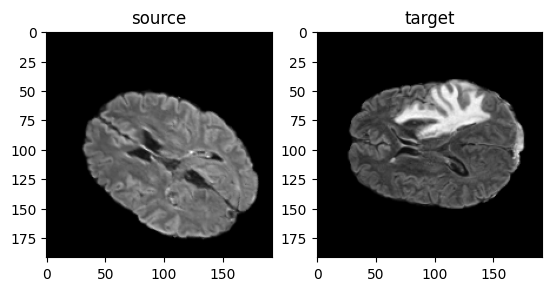

In [23]:
fig, ax = plt.subplots(1,2)
T, _, D, H, W = source.shape

# Choose a central slice for plotting
slice_index = W // 2
ax[0].imshow(source[0,0,..., slice_index], cmap='gray')
ax[0].set_title(f'source')

ax[1].imshow(target[0,0,..., slice_index], cmap='gray')
ax[1].set_title(f'target')

In [17]:
# prompt: empty GPU memory
del mr
import torch
import gc
torch.cuda.empty_cache()
gc.collect()

46088

In [24]:
kernelOperator = rk.GaussianRKHS(sigma=(10,10,10),normalized=False)
datacost = mt.Rotation_Ssd_Cost(img_1.to('cuda:0'), alpha=.5)

momenta = mtrt.prepare_momenta(
    # mr.source.shape,
    img_1.shape,
    image=True,
    rotation=True,
    translation=True,
    rot_prior=best_momentum.detach().clone(),trans_prior=best_translation.detach().clone(),
)

for v in momenta.values():
    print(v.requires_grad)

mr = mt.rigid_along_metamorphosis(
    img_1, img_2, momenta_ini=momenta,
    kernelOperator= kernelOperator,
    rho = 1,
    data_term=datacost ,
    integration_steps = 10,
    cost_cst=.1,
    n_iter=5,
    save_gpu_memory=False,
    lbfgs_max_iter = 20,
    lbfgs_history_size = 20,
)

# mr = mt.metamorphosis(
#     img_1, img_2, momentum_ini=momenta,
#     kernelOperator= kernelOperator,
#     rho = 1,
#     data_term=datacost ,
#     integration_steps = 10,
#     cost_cst=.1,
#     n_iter=10,
#     grad_coef=1
# )

mr.plot_cost()

# a3s.compare_images_with_landmarks(mr.mp.image, img_1,
#                                   labels= ["Final", "source"],)
# a3s.compare_images_with_landmarks(mr.mp.image, img_2,
#                                   labels= ["Final", "target_b"],)

True
True
True
dict_keys(['source', 'target', 'geodesic', 'cost_cst', 'data_term', 'hamiltonian_integration', 'debug', 'lbfgs_max_iter', 'lbfgs_history_size'])
momenta type <class 'dict'>
momenta keys dict_keys(['momentum_I', 'momentum_R', 'momentum_T'])


OutOfMemoryError: CUDA out of memory. Tried to allocate 136.00 MiB. GPU 0 has a total capacity of 39.56 GiB of which 94.88 MiB is free. Process 530041 has 39.46 GiB memory in use. Of the allocated memory 35.99 GiB is allocated by PyTorch, and 2.95 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [14]:
# prompt: Peux tu me faire une figure qui prends les images dans mr.mp.image_stock (tensor de taille [T,1,D,H,W]) et me plotter une coupe pour chaque temps (T) ? Peux tu ajouter une deuxième colonne avec la comparaison avec l'image target (mr.target) en utilisant tb.imgCmp()

import matplotlib.pyplot as plt

def plot_metamorphosis_slices(mr):
    """
    Plots slices of the metamorphosis images at each time step and compares them
    to the target image.

    Args:
        mr: An object representing the metamorphosis process, expected to have
            an attribute mr.mp.image_stock (tensor of shape [T, 1, D, H, W])
            and mr.target (tensor of shape [1, D, H, W]).
    """

    # mr.to_device('cpu')
    image_stock = mr.mp.image_stock.cpu()  # Remove channel dim and move to numpy
    target_image = mr.target.cpu() # Remove batch dim and move to numpy
    T, _, D, H, W = image_stock.shape

    # Choose a central slice for plotting
    slice_index = W // 2

    fig, axes = plt.subplots(T, 2, figsize=(10, T * 5))

    for t in range(T):
        # Plot the metamorphosis image slice
        axes[t, 0].imshow(image_stock[t,0, :, :,slice_index], cmap='gray')
        axes[t, 0].set_title(f'Time Step {t}')
        axes[t, 0].axis('off')

        # Plot the comparison with the target image using tb.imgCmp
        # tb.imgCmp expects tensors, so convert numpy arrays back to tensors
        img = image_stock[t, ..., slice_index][None].to("cpu")
        target_tensor = mr.target[..., slice_index].to("cpu") # Get the slice and add batch/channel dims

        comparison_img = tb.imCmp(img, target_tensor, "compose")[0]
        print("comparison_img shape",comparison_img.shape)

        axes[t, 1].imshow(comparison_img, cmap='gray') # Use 'gray' or adjust cmap as needed
        axes[t, 1].set_title(f'Comparison with Target (Time Step {t})')
        axes[t, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Assuming 'mr' is the metamorphosis object created in the preceding code
plot_metamorphosis_slices(mr)


AttributeError: 'RigidMetamorphosis_integrator' object has no attribute 'image_stock'

Text(0.5, 1.0, 'target')

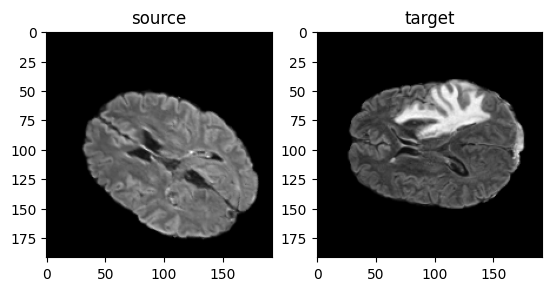